In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
Config.data_path()

PosixPath('/home/jupyter/.fastai/data')

In [4]:
path = Config.data_path()/'planet'
print(path)

/home/jupyter/.fastai/data/planet


In [5]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [6]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [7]:
np.random.seed(42)
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(sep=' '))

data = (src.transform(tfms, size=256)
        .databunch(bs=16).normalize(imagenet_stats))

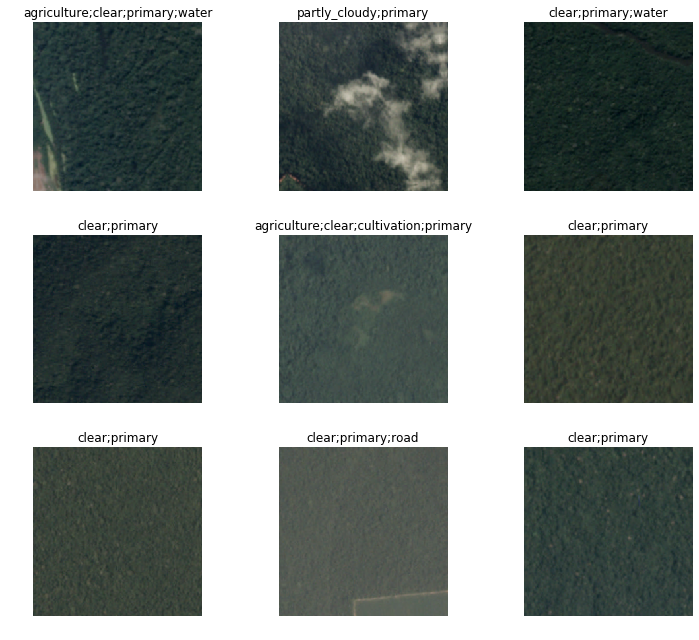

In [8]:
data.show_batch(rows=3, figsize=(10,9))

In [9]:
arch = models.resnet50

In [10]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, arch, metrics=[acc_02, f_score])

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


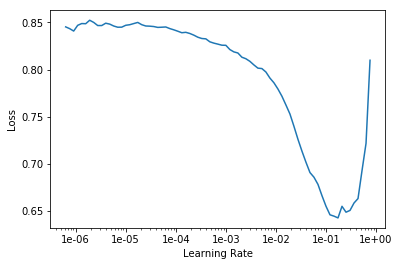

In [12]:
learn.recorder.plot()

In [13]:
lr = 0.01

In [14]:
learn.fit_one_cycle(5, slice(lr))

Total time: 34:53
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.127487    0.109543    0.953472         0.906905  (06:59)
2      0.130090    0.134826    0.940493         0.907909  (06:58)
3      0.112288    0.129828    0.956989         0.917980  (06:58)
4      0.109908    0.094264    0.957817         0.923515  (06:58)
5      0.093114    0.263249    0.958399         0.923928  (06:59)



In [15]:
learn.save('stage-1-rn50')

In [16]:
learn.load('stage-1-rn50')

Learner(data=ImageDataBunch;
Train: LabelList
y: MultiCategoryList (32384 items)
[MultiCategory haze;primary, MultiCategory clear;primary, MultiCategory clear;primary, MultiCategory haze;primary;water, MultiCategory agriculture;clear;cultivation;primary;water]...
Path: .
x: ImageItemList (32384 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: /home/jupyter/.fastai/data/planet;
Valid: LabelList
y: MultiCategoryList (8095 items)
[MultiCategory clear;primary;road, MultiCategory clear;primary;water, MultiCategory clear;conventional_mine;habitation;primary;road;water, MultiCategory cloudy, MultiCategory agriculture;clear;cultivation;cultivation;habitation;primary;road;water]...
Path: .
x: ImageItemList (8095 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: /home/jupyter/.fastai/data/planet;
Test: None, model=Sequential(
  (0): Sequential(
    (0):

In [17]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


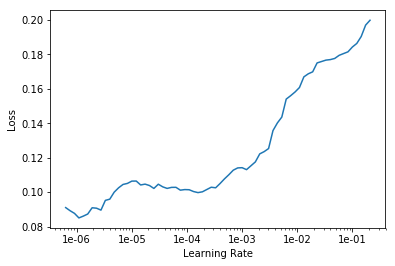

In [18]:
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(5, slice(1e-6, 1e-4))

Total time: 47:06
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.097605    0.387602    0.958900         0.923218  (09:24)
2      0.102396    0.093879    0.956582         0.923886  (09:25)
3      0.096622    0.099483    0.959851         0.924692  (09:25)
4      0.097065    0.091868    0.959285         0.925087  (09:25)
5      0.097884    0.088074    0.959067         0.925837  (09:25)



In [20]:
learn.save('stage-2-rn50')

In [21]:
learn.load('stage-2-rn50')

Learner(data=ImageDataBunch;
Train: LabelList
y: MultiCategoryList (32384 items)
[MultiCategory haze;primary, MultiCategory clear;primary, MultiCategory clear;primary, MultiCategory haze;primary;water, MultiCategory agriculture;clear;cultivation;primary;water]...
Path: .
x: ImageItemList (32384 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: /home/jupyter/.fastai/data/planet;
Valid: LabelList
y: MultiCategoryList (8095 items)
[MultiCategory clear;primary;road, MultiCategory clear;primary;water, MultiCategory clear;conventional_mine;habitation;primary;road;water, MultiCategory cloudy, MultiCategory agriculture;clear;cultivation;cultivation;habitation;primary;road;water]...
Path: .
x: ImageItemList (8095 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: /home/jupyter/.fastai/data/planet;
Test: None, model=Sequential(
  (0): Sequential(
    (0):

In [22]:
learn.data = (src.add_test_folder('test-jpg')
        .transform(tfms, size=256)
        .databunch(bs=8).normalize(imagenet_stats))

#learn.data = (
#    ImageItemList
#        .from_csv(path, 'train_v2.csv', folder="train-jpg", suffix=".jpg")
#        .random_split_by_pct(0.2)
#        .label_from_df(sep=' ')
#        .add_test_folder('test-jpg')
#        .transform(tfms, size=256)
#        .databunch()
#        .normalize(imagenet_stats)
#)

In [23]:
len(learn.data.train_ds)

32384

In [24]:
len(learn.data.valid_ds)

8095

In [25]:
len(learn.data.test_ds)

61191

In [26]:
len(learn.data.train_dl)

4048

In [27]:
len(learn.data.valid_dl)

675

In [28]:
len(learn.data.test_dl)

5100

In [29]:
learn.data.train_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f652491ba58>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7f65253e7c80>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))], collate_fn=<function data_collate at 0x7f652c2b6c80>, skip_size1=True)

In [30]:
learn.data.valid_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f652491bbe0>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7f65253e7c80>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))], collate_fn=<function data_collate at 0x7f652c2b6c80>, skip_size1=False)

In [31]:
learn.data.test_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f652491b5c0>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7f65253e7c80>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))], collate_fn=<function data_collate at 0x7f652c2b6c80>, skip_size1=False)

In [32]:
learn.data.train_ds

LabelList
y: MultiCategoryList (32384 items)
[MultiCategory haze;primary, MultiCategory clear;primary, MultiCategory clear;primary, MultiCategory haze;primary;water, MultiCategory agriculture;clear;cultivation;primary;water]...
Path: .
x: ImageItemList (32384 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: /home/jupyter/.fastai/data/planet

In [33]:
learn.data.valid_ds

LabelList
y: MultiCategoryList (8095 items)
[MultiCategory clear;primary;road, MultiCategory clear;primary;water, MultiCategory clear;conventional_mine;habitation;primary;road;water, MultiCategory cloudy, MultiCategory agriculture;clear;cultivation;cultivation;habitation;primary;road;water]...
Path: .
x: ImageItemList (8095 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: /home/jupyter/.fastai/data/planet

In [34]:
learn.data.test_ds

LabelList
y: MultiCategoryList (61191 items)
[MultiCategory haze;primary, MultiCategory haze;primary, MultiCategory haze;primary, MultiCategory haze;primary, MultiCategory haze;primary]...
Path: .
x: ImageItemList (61191 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: /home/jupyter/.fastai/data/planet

In [35]:
predictions = learn.TTA(ds_type=DatasetType.Test)[0]
#predictions = learn.get_preds(ds_type=DatasetType.Test)

Total time: 41:24



In [65]:
torch.save(predictions,'predictions_sz_256.pt')

In [53]:
predictions.shape

torch.Size([61191, 17])

In [37]:
len(predictions[0])

17

In [52]:
predictions

tensor([[9.9605e-01, 3.8227e-02, 2.5394e-03,  ..., 9.9692e-01, 1.5233e-05,
         6.4728e-05],
        [3.3302e-03, 1.1134e-02, 1.9001e-04,  ..., 9.9978e-01, 9.9432e-06,
         7.6239e-05],
        [7.7753e-01, 2.5342e-02, 1.5129e-01,  ..., 1.1019e-01, 7.3162e-05,
         1.5437e-04],
        ...,
        [5.7708e-02, 6.5330e-01, 3.5432e-03,  ..., 9.9404e-01, 6.9614e-05,
         7.1872e-04],
        [6.0280e-04, 4.4898e-04, 6.6149e-02,  ..., 6.7889e-03, 9.4835e-07,
         6.0276e-06],
        [1.4560e-01, 1.8002e-02, 8.7349e-02,  ..., 6.6708e-02, 2.3396e-04,
         4.2377e-04]])

In [51]:
len(predictions)

61191

In [47]:
def find_tags(pred, thresh):
    classes = ""
    for idx, val in enumerate(pred):
        if val > thresh:
            classes = f'{classes} {learn.data.classes[idx]}'
    return classes.strip()

In [48]:
def predict(idx):
    pred_vals = predictions[0][idx]
    tags = find_tags(pred_vals, 0.2)
    print(tags)
    img = learn.data.test_ds[idx][0]
    return img

water primary clear


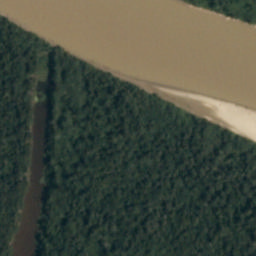

In [42]:
predict(0)

In [55]:
def get_row(idx):
    pred = predictions[idx]
    tags = find_tags(pred, 0.2)
    image_path = learn.data.test_ds.x.items[idx]
    image_name = re.search(r'([^/]+)$', f'{image_path}')[0].replace('.jpg', '')
    
    return image_name, tags

In [56]:
get_row(0)

('file_11457', 'water primary clear')

In [58]:
df = pd.DataFrame(columns=['image_name', 'tags'])
for idx in range(len(predictions)):
    if idx % 1000 == 0:
        print(f"Completed: {idx}")
        
    image_name, tags = get_row(idx)
    df.loc[idx] = [image_name, tags]

Completed: 0
Completed: 1000
Completed: 2000
Completed: 3000
Completed: 4000
Completed: 5000
Completed: 6000
Completed: 7000
Completed: 8000
Completed: 9000
Completed: 10000
Completed: 11000
Completed: 12000
Completed: 13000
Completed: 14000
Completed: 15000
Completed: 16000
Completed: 17000
Completed: 18000
Completed: 19000
Completed: 20000
Completed: 21000
Completed: 22000
Completed: 23000
Completed: 24000
Completed: 25000
Completed: 26000
Completed: 27000
Completed: 28000
Completed: 29000
Completed: 30000
Completed: 31000
Completed: 32000
Completed: 33000
Completed: 34000
Completed: 35000
Completed: 36000
Completed: 37000
Completed: 38000
Completed: 39000
Completed: 40000
Completed: 41000
Completed: 42000
Completed: 43000
Completed: 44000
Completed: 45000
Completed: 46000
Completed: 47000
Completed: 48000
Completed: 49000
Completed: 50000
Completed: 51000
Completed: 52000
Completed: 53000
Completed: 54000
Completed: 55000
Completed: 56000
Completed: 57000
Completed: 58000
Completed:

In [59]:
df.head()

,image_name,tags
0,file_11457,water primary clear
1,test_17412,primary clear
2,file_11115,water cloudy primary
3,test_17884,road partly_cloudy agriculture primary
4,test_34419,water cloudy clear


In [60]:
submission_path = 'submission_fastai_1.0.27_sz_256_val_0.2.csv'
df.to_csv(submission_path, index=False)

Kaggle allows **late submission** to check your score
![](kaggle.png)